In [1]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [40]:
#Importing Libraries that will be used for this project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
# Importing all the csv files and storing them in Dataframes

innings = pd.read_csv(r'/Users/abdullahmunir/Desktop/ATOMCAMP/Python/EDA/ICC Cricket World Cup/innings.csv')
matches = pd.read_csv(r'/Users/abdullahmunir/Desktop/ATOMCAMP/Python/EDA/ICC Cricket World Cup/matches.csv')
overballdetails = pd.read_csv(r'/Users/abdullahmunir/Desktop/ATOMCAMP/Python/EDA/ICC Cricket World Cup/overBallDetails.csv')
overhistory = pd.read_csv(r'/Users/abdullahmunir/Desktop/ATOMCAMP/Python/EDA/ICC Cricket World Cup/overHistory.csv', low_memory=False)
players= pd.read_csv(r'/Users/abdullahmunir/Desktop/ATOMCAMP/Python/EDA/ICC Cricket World Cup/players.csv')
teams = pd.read_csv(r'/Users/abdullahmunir/Desktop/ATOMCAMP/Python/EDA/ICC Cricket World Cup/teams.csv')
venues = pd.read_csv(r'/Users/abdullahmunir/Desktop/ATOMCAMP/Python/EDA/ICC Cricket World Cup/venues.csv')

In [4]:
# Now we perform Data Cleaning and an initial overview into each DF separately

#INNINGS

innings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2682 non-null   int64  
 1   matchId        2682 non-null   int64  
 2   inningsNumber  2682 non-null   int64  
 3   runRate        2682 non-null   float64
 4   overProgress   2682 non-null   float64
 5   runs           2682 non-null   int64  
 6   wkts           2682 non-null   int64  
 7   ballsFaced     2682 non-null   int64  
 8   fours          2682 non-null   int64  
 9   sixes          2682 non-null   int64  
 10  allOut         2682 non-null   bool   
 11  noBallRuns     2682 non-null   int64  
 12  wideRuns       2682 non-null   int64  
 13  byeRuns        2682 non-null   int64  
 14  legByeRuns     2682 non-null   int64  
 15  penaltyRuns    2682 non-null   int64  
 16  battingTeamId  601 non-null    float64
 17  bowlingTeamId  601 non-null    float64
dtypes: bool(

In [5]:
#Change name of match id to id and existing id column to ser no, for consistency

innings.rename(columns = {'id':'ser'},inplace=True)
innings.columns.values[1] = 'id'

#Now looking at missing values

print(innings.isnull().sum())

innings.dtypes

#Filling in missing values

innings_filled = innings.fillna('Missing Value', inplace = True)


ser                 0
id                  0
inningsNumber       0
runRate             0
overProgress        0
runs                0
wkts                0
ballsFaced          0
fours               0
sixes               0
allOut              0
noBallRuns          0
wideRuns            0
byeRuns             0
legByeRuns          0
penaltyRuns         0
battingTeamId    2081
bowlingTeamId    2081
dtype: int64


In [6]:
# Now checking for duplicate Rows

innings.duplicated().sum()

0

In [7]:
# Looking over Data Statistics

innings.describe()

,ser,id,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns
count,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.00000
mean,1341.500000,26651.462342,1.494407,5.275459,43.772110,231.857196,7.419090,58.701342,4.330723,0.953766,0.666294,7.340418,0.911633,3.388516,0.02610
std,774.371035,38412.373645,0.500062,1.174865,8.996007,70.897934,2.740889,112.282896,8.785216,2.434082,1.089493,4.462542,1.690977,2.794141,0.36037
min,1.000000,543.000000,1.000000,2.370000,0.400000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,671.250000,3166.000000,1.000000,4.442500,41.000000,186.000000,6.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.00000
50%,1341.500000,6896.000000,1.000000,5.210000,48.200000,233.500000,8.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,3.000000,0.00000
75%,2011.750000,31750.000000,2.000000,6.000000,50.000000,282.000000,10.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.000000,5.000000,0.00000
max,2682.000000,102980.000000,2.000000,14.160000,50.000000,498.000000,11.000000,300.000000,48.000000,26.000000,13.000000,37.000000,13.000000,16.000000,5.00000


In [8]:
#defining function for data checking
def datachecking(data):
    print("-----------column----------")
    print(data.columns)
    print("----------info-----------")
    print(data.info())
    print("----------shape-----------")
    print(data.shape)
    print("----------duplicate-----------") 
    print(data.duplicated().sum())
    print("----------column types-----------") 
    print(data.dtypes)
    print("----------missing values sum-----------") 
    print(data.isnull().sum())
    print("----------end-----------")  

In [9]:
datachecking(innings)

-----------column----------
Index(['ser', 'id', 'inningsNumber', 'runRate', 'overProgress', 'runs', 'wkts',
       'ballsFaced', 'fours', 'sixes', 'allOut', 'noBallRuns', 'wideRuns',
       'byeRuns', 'legByeRuns', 'penaltyRuns', 'battingTeamId',
       'bowlingTeamId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ser            2682 non-null   int64  
 1   id             2682 non-null   int64  
 2   inningsNumber  2682 non-null   int64  
 3   runRate        2682 non-null   float64
 4   overProgress   2682 non-null   float64
 5   runs           2682 non-null   int64  
 6   wkts           2682 non-null   int64  
 7   ballsFaced     2682 non-null   int64  
 8   fours          2682 non-null   int64  
 9   sixes          2682 non-null   int64  
 10  allOut         2682 non-null   bool   
 

In [10]:
# Now moving to cleaning next Dataframe. All dataframes will be cleaned and sensitized before beginning to do eda

datachecking(matches)


-----------column----------
Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchEndDateMs',
       ...
       'Unnamed: 164', 'Unnamed: 165', 'Unnamed: 166', 'Unnamed: 167',
       'Unnamed: 168', 'Unnamed: 169', 'Unnamed: 170', 'Unnamed: 171',
       'Unnamed: 172', 'Unnamed: 173'],
      dtype='object', length=174)
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 174 entries, id to Unnamed: 173
dtypes: bool(1), float64(156), int64(5), object(12)
memory usage: 2.2+ MB
None
----------shape-----------
(1700, 174)
----------duplicate-----------
0
----------column types-----------
id                int64
venueId           int64
toss.elected     object
toss.winner      object
team1Id           int64
                 ...   
Unnamed: 169    float64
Unnamed: 170    float64
Unnamed: 171    float64
Unnamed: 172    float64
Unnamed: 173    float64
Length: 1

In [11]:
#Removing all extra columns starting with Unnamed

def remove_unnamed_columns(df):
    unnamed_columns = [col for col in df.columns if col.startswith("Unnamed")]
    df.drop(columns=unnamed_columns, inplace=True)
    return df
matches = remove_unnamed_columns(matches)

#Now to check matches after removal of columns
datachecking(matches)

-----------column----------
Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchEndDateMs',
       'matchStatus_outcome', 'matchStatus_text',
       'matchStatus_victoryMarginRuns', 'matchStatus_victoryMarginWickets',
       'matchStatus_victoryMarginInningsRuns', 'description', 'matchSummary',
       'matchType', 'tournamentLabel', 'oversLimit', 'totalBalls',
       'isLimitedOvers', 'match.summary', 'matchStatus', 'umpire.name.5'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    1700 non-null   int64  
 1   venueId                               1700 non-null   int64  
 2   toss.elected                          1600 non-null 

In [12]:
# Remove all columns with all values as null

def remove_all_null_columns(df):
    df.dropna(axis = 1, how = 'all', inplace = True)
    return df
matches = remove_all_null_columns(matches)

# Removing umpire.name.5 column as well, as it has only 2 non-null entries

matches.drop(columns='umpire.name.5',axis = 1, inplace=True)
datachecking(matches)

-----------column----------
Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchEndDateMs',
       'matchStatus_outcome', 'matchStatus_text',
       'matchStatus_victoryMarginRuns', 'matchStatus_victoryMarginWickets',
       'description', 'matchSummary', 'matchType', 'tournamentLabel',
       'oversLimit', 'totalBalls', 'isLimitedOvers', 'match.summary'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1700 non-null   int64  
 1   venueId                           1700 non-null   int64  
 2   toss.elected                      1600 non-null   object 
 3   toss.winner                       1600 non-null   object 
 4   team1Id              

In [13]:
#in the toss.elected column, i want what the winning team decided to do only

matches['toss.elected'] = matches['toss.elected'].str.split().str[-1]
print(matches['toss.elected'].nunique())


#Cleaning and standardizing

matches['toss.elected'] = matches['toss.elected'].str.lower().map({'bat': 'Bat', 'field': 'Field', 'bowl': 'Field'})
print(matches['toss.elected'].unique())
datachecking(matches)

5
['Bat' 'Field' nan]
-----------column----------
Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchEndDateMs',
       'matchStatus_outcome', 'matchStatus_text',
       'matchStatus_victoryMarginRuns', 'matchStatus_victoryMarginWickets',
       'description', 'matchSummary', 'matchType', 'tournamentLabel',
       'oversLimit', 'totalBalls', 'isLimitedOvers', 'match.summary'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1700 non-null   int64  
 1   venueId                           1700 non-null   int64  
 2   toss.elected                      1600 non-null   object 
 3   toss.winner                       1600 non-null   object 
 4  

In [14]:
#Removing more columns with too many null values

columns_to_remove = ['matchEndDateMs', 'matchStatus_victoryMarginRuns', 'matchStatus_victoryMarginWickets','matchSummary','totalBalls','match.summary']
matches.drop(columns = columns_to_remove, inplace = True)

In [15]:
datachecking(matches)

-----------column----------
Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchStatus_outcome',
       'matchStatus_text', 'description', 'matchType', 'tournamentLabel',
       'oversLimit', 'isLimitedOvers'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1700 non-null   int64  
 1   venueId              1700 non-null   int64  
 2   toss.elected         1600 non-null   object 
 3   toss.winner          1600 non-null   object 
 4   team1Id              1700 non-null   int64  
 5   team2Id              1700 non-null   int64  
 6   matchDate            1700 non-null   object 
 7   matchEndDate         1674 non-null   object 
 8   matchDateMs          1675 non-null   float64
 9

In [16]:
# Filling in missing values

matches['toss.elected'].fillna('Missing Value', inplace=True)

matches['toss.winner'].fillna('Missing Value', inplace=True)

matches['matchStatus_outcome'].fillna('Missing Value', inplace=True)

matches['matchEndDate'].fillna('Missing Value', inplace=True)

matches['matchStatus_text'].fillna('Missing Value', inplace=True)

In [17]:
datachecking(matches)

-----------column----------
Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchStatus_outcome',
       'matchStatus_text', 'description', 'matchType', 'tournamentLabel',
       'oversLimit', 'isLimitedOvers'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1700 non-null   int64  
 1   venueId              1700 non-null   int64  
 2   toss.elected         1700 non-null   object 
 3   toss.winner          1700 non-null   object 
 4   team1Id              1700 non-null   int64  
 5   team2Id              1700 non-null   int64  
 6   matchDate            1700 non-null   object 
 7   matchEndDate         1700 non-null   object 
 8   matchDateMs          1675 non-null   float64
 9

In [18]:
datachecking(matches)


-----------column----------
Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchStatus_outcome',
       'matchStatus_text', 'description', 'matchType', 'tournamentLabel',
       'oversLimit', 'isLimitedOvers'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1700 non-null   int64  
 1   venueId              1700 non-null   int64  
 2   toss.elected         1700 non-null   object 
 3   toss.winner          1700 non-null   object 
 4   team1Id              1700 non-null   int64  
 5   team2Id              1700 non-null   int64  
 6   matchDate            1700 non-null   object 
 7   matchEndDate         1700 non-null   object 
 8   matchDateMs          1675 non-null   float64
 9

In [19]:
# Now onto the overBallDetails dataframe

datachecking(overballdetails)


-----------column----------
Index(['id', 'countingBall', 'nonCountingBall', 'score', 'bowlerId',
       'facingBatsmanId', 'boundary', 'overHistoryId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157323 entries, 0 to 157322
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               157323 non-null  int64  
 1   countingBall     157323 non-null  int64  
 2   nonCountingBall  157323 non-null  int64  
 3   score            157323 non-null  object 
 4   bowlerId         157222 non-null  float64
 5   facingBatsmanId  157320 non-null  float64
 6   boundary         157323 non-null  bool   
 7   overHistoryId    157323 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 8.6+ MB
None
----------shape-----------
(157323, 8)
----------duplicate-----------
0
----------column types-----------
id                   int64
countingBa

In [20]:
# removing rows with null values of bowler id and facing batsman id. in a dataset this big, these small values shouldn't have a big impact on final results

overballdetails.dropna(subset=['bowlerId', 'facingBatsmanId'], inplace=True)
datachecking(overballdetails)



-----------column----------
Index(['id', 'countingBall', 'nonCountingBall', 'score', 'bowlerId',
       'facingBatsmanId', 'boundary', 'overHistoryId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
Index: 157219 entries, 0 to 157322
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               157219 non-null  int64  
 1   countingBall     157219 non-null  int64  
 2   nonCountingBall  157219 non-null  int64  
 3   score            157219 non-null  object 
 4   bowlerId         157219 non-null  float64
 5   facingBatsmanId  157219 non-null  float64
 6   boundary         157219 non-null  bool   
 7   overHistoryId    157219 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 9.7+ MB
None
----------shape-----------
(157219, 8)
----------duplicate-----------
0
----------column types-----------
id                   int64
countingBall   

In [21]:
# Cleaning and viewing overhistory dataframe

datachecking(overhistory)

-----------column----------
Index(['ovNo', 'ovBalls/0', 'ovBalls/1', 'ovBalls/2', 'ovBalls/3', 'ovBalls/4',
       'ovBalls/5', 'ovBalls/6', 'id', 'inningId', 'ovBalls/7', 'ovBalls/8',
       'ovBalls/9', 'ovBalls/10', 'ovBalls/11', 'ovBalls/12', 'ovBalls/13',
       'bowlerId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110411 entries, 0 to 110410
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ovNo        110411 non-null  int64  
 1   ovBalls/0   110411 non-null  object 
 2   ovBalls/1   110164 non-null  object 
 3   ovBalls/2   109906 non-null  object 
 4   ovBalls/3   109665 non-null  object 
 5   ovBalls/4   109405 non-null  object 
 6   ovBalls/5   108996 non-null  object 
 7   ovBalls/6   14563 non-null   object 
 8   id          110411 non-null  int64  
 9   inningId    110411 non-null  int64  
 10  ovBalls/7   1998 non-null    object 
 11  ovBalls/8

In [22]:
# Removing Columns with too many missing entries

columns_to_remove = ['ovBalls/6', 'ovBalls/7', 'ovBalls/8', 'ovBalls/9', 'ovBalls/10', 'ovBalls/11', 'ovBalls/12', 'ovBalls/13']

overhistory.drop(columns=columns_to_remove, inplace=True)


In [23]:
datachecking(overhistory)

-----------column----------
Index(['ovNo', 'ovBalls/0', 'ovBalls/1', 'ovBalls/2', 'ovBalls/3', 'ovBalls/4',
       'ovBalls/5', 'id', 'inningId', 'bowlerId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110411 entries, 0 to 110410
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ovNo       110411 non-null  int64  
 1   ovBalls/0  110411 non-null  object 
 2   ovBalls/1  110164 non-null  object 
 3   ovBalls/2  109906 non-null  object 
 4   ovBalls/3  109665 non-null  object 
 5   ovBalls/4  109405 non-null  object 
 6   ovBalls/5  108996 non-null  object 
 7   id         110411 non-null  int64  
 8   inningId   110411 non-null  int64  
 9   bowlerId   25729 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 8.4+ MB
None
----------shape-----------
(110411, 10)
----------duplicate-----------
0
----------column types-----------
ovNo           i

In [24]:
# Filling missing data with 0s, because that's what happens on dot balls

columns_to_impute_zero = ['ovBalls/1', 'ovBalls/2', 'ovBalls/3', 'ovBalls/4', 'ovBalls/5']

overhistory[columns_to_impute_zero] = overhistory[columns_to_impute_zero].fillna(0)
datachecking(overhistory)

overhistory['bowlerId'].fillna(-9999, inplace=True)

-----------column----------
Index(['ovNo', 'ovBalls/0', 'ovBalls/1', 'ovBalls/2', 'ovBalls/3', 'ovBalls/4',
       'ovBalls/5', 'id', 'inningId', 'bowlerId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110411 entries, 0 to 110410
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ovNo       110411 non-null  int64  
 1   ovBalls/0  110411 non-null  object 
 2   ovBalls/1  110411 non-null  object 
 3   ovBalls/2  110411 non-null  object 
 4   ovBalls/3  110411 non-null  object 
 5   ovBalls/4  110411 non-null  object 
 6   ovBalls/5  110411 non-null  object 
 7   id         110411 non-null  int64  
 8   inningId   110411 non-null  int64  
 9   bowlerId   25729 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 8.4+ MB
None
----------shape-----------
(110411, 10)
----------duplicate-----------
0
----------column types-----------
ovNo           i

In [25]:
# Cleaning 'Players' Dataframe

datachecking(players)

-----------column----------
Index(['id', 'fullName', 'shortName', 'nationality', 'dateOfBirth',
       'rightArmedBowl', 'rightHandedBat', 'bowlingStyle', 'teamId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28911 entries, 0 to 28910
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              28911 non-null  int64 
 1   fullName        28911 non-null  object
 2   shortName       28911 non-null  object
 3   nationality     28249 non-null  object
 4   dateOfBirth     28349 non-null  object
 5   rightArmedBowl  28911 non-null  bool  
 6   rightHandedBat  28911 non-null  bool  
 7   bowlingStyle    18328 non-null  object
 8   teamId          28911 non-null  int64 
dtypes: bool(2), int64(2), object(5)
memory usage: 1.6+ MB
None
----------shape-----------
(28911, 9)
----------duplicate-----------
0
----------column types-----------
id                 int64


In [26]:
# renaming id to player_id
players.rename(columns={'id': 'playerId'}, inplace=True)

#Removing duplicates

players.drop_duplicates(subset='playerId', keep='first', inplace=True)

In [27]:
# checking for duplicates

players.describe(include = 'all')

,playerId,fullName,shortName,nationality,dateOfBirth,rightArmedBowl,rightHandedBat,bowlingStyle,teamId
count,1.911000e+03,1911,1911,1721,1743,1911,1911,696,1.911000e+03
unique,NaN,1848,1840,46,1623,2,2,6,NaN
top,NaN,Bilal Khan,A Ali,Australian,1970-01-01,False,True,MEDIUM_SEAM,NaN
freq,NaN,3,4,145,6,1093,1570,223,NaN
mean,4.675277e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.001669e+07
std,1.790164e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.978049e+08
min,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000e+01
25%,1.228500e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.872500e+03
50%,2.294000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.312000e+03
75%,2.889000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.330500e+03


In [28]:
# Filling  missing data in with "Unknown"

players['bowlingStyle'].fillna("Unknown", inplace=True)

players['nationality'].fillna("Unknown", inplace=True)

players['dateOfBirth'].fillna("Unknown", inplace=True)

In [29]:
datachecking(players)

-----------column----------
Index(['playerId', 'fullName', 'shortName', 'nationality', 'dateOfBirth',
       'rightArmedBowl', 'rightHandedBat', 'bowlingStyle', 'teamId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
Index: 1911 entries, 0 to 28910
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   playerId        1911 non-null   int64 
 1   fullName        1911 non-null   object
 2   shortName       1911 non-null   object
 3   nationality     1911 non-null   object
 4   dateOfBirth     1911 non-null   object
 5   rightArmedBowl  1911 non-null   bool  
 6   rightHandedBat  1911 non-null   bool  
 7   bowlingStyle    1911 non-null   object
 8   teamId          1911 non-null   int64 
dtypes: bool(2), int64(2), object(5)
memory usage: 123.2+ KB
None
----------shape-----------
(1911, 9)
----------duplicate-----------
0
----------column types-----------
playerId           int64

In [30]:
# Now on to Teams Dataframe

datachecking(teams)

-----------column----------
Index(['id', 'fullName', 'shortName', 'abbreviation', 'wicketKeeperId',
       'captainId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              354 non-null    int64  
 1   fullName        354 non-null    object 
 2   shortName       354 non-null    object 
 3   abbreviation    354 non-null    object 
 4   wicketKeeperId  347 non-null    float64
 5   captainId       348 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 16.7+ KB
None
----------shape-----------
(354, 6)
----------duplicate-----------
0
----------column types-----------
id                  int64
fullName           object
shortName          object
abbreviation       object
wicketKeeperId    float64
captainId         float64
dtype: object
----------missing values s

In [31]:
# Changing ID to team_id

teams.rename(columns={'id': 'team_id'}, inplace=True)

#removing rows without keeper or team captain id

teams.dropna(inplace=True)

In [32]:
# Checking how many entries of each country's team are made
teams['fullName'].value_counts()

fullName
Sri Lanka                   38
Australia                   28
Zimbabwe                    27
Pakistan                    25
West Indies                 25
India                       24
New Zealand                 24
South Africa                22
England                     20
Afghanistan                 15
Bangladesh                  15
Scotland                    11
United Arab Emirates         9
Ireland                      9
Netherlands                  8
Nepal                        8
Kenya                        7
Papua New Guinea             6
Namibia                      5
Canada                       5
Oman                         4
Hong Kong                    4
United States of America     4
East Africa                  2
Jersey                       1
Bermuda                      1
Name: count, dtype: int64

In [33]:
# Lastly, we clean and Organise the Venues Dataframe

datachecking(venues)

-----------column----------
Index(['id', 'fullName', 'shortName', 'city', 'country'], dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         193 non-null    int64 
 1   fullName   193 non-null    object
 2   shortName  173 non-null    object
 3   city       185 non-null    object
 4   country    173 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.7+ KB
None
----------shape-----------
(193, 5)
----------duplicate-----------
0
----------column types-----------
id            int64
fullName     object
shortName    object
city         object
country      object
dtype: object
----------missing values sum-----------
id            0
fullName      0
shortName    20
city          8
country      20
dtype: int64
----------end-----------


In [34]:
# Filling missing entries with "Unknown"

venues.fillna("Unknown", inplace=True)

In [35]:
#Changing column name id to venueId

venues.rename(columns={'id': 'venueId'}, inplace=True)

In [36]:
# ALL DATAFRAMES HAVE BEEN CLEANED NOW, ON TO EDA!

In [37]:
#Analyzing INNINGS

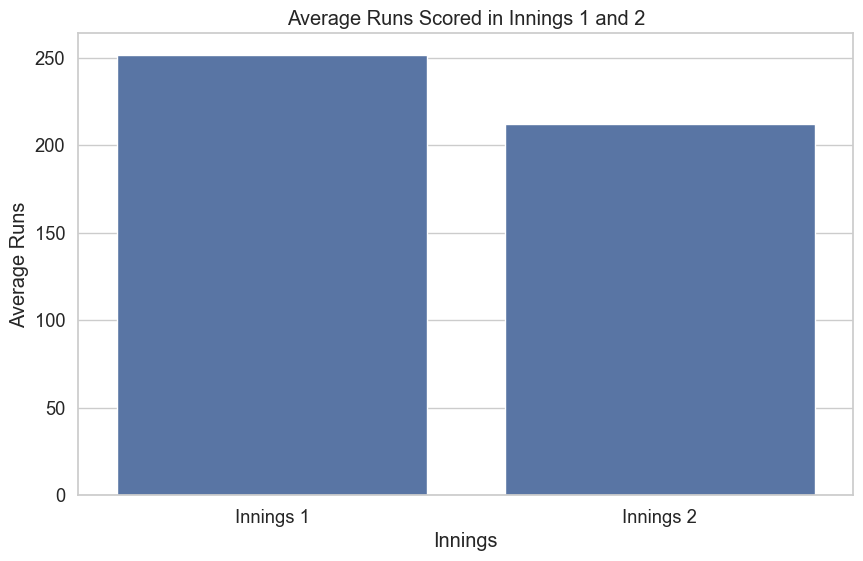

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Comparing Runs Scored in Innings 1 and Innings 2
# Calculate average runs for Innings 1 and Innings 2
average_runs_inning1 = innings[innings['inningsNumber'] == 1]['runs'].mean()
average_runs_inning2 = innings[innings['inningsNumber'] == 2]['runs'].mean()

# Create a bar chart for average runs
sns.barplot(x=['Innings 1', 'Innings 2'], y=[average_runs_inning1, average_runs_inning2])

# Set titles and labels
plt.title('Average Runs Scored in Innings 1 and 2')
plt.xlabel('Innings')
plt.ylabel('Average Runs')

# Show the plot
plt.show()

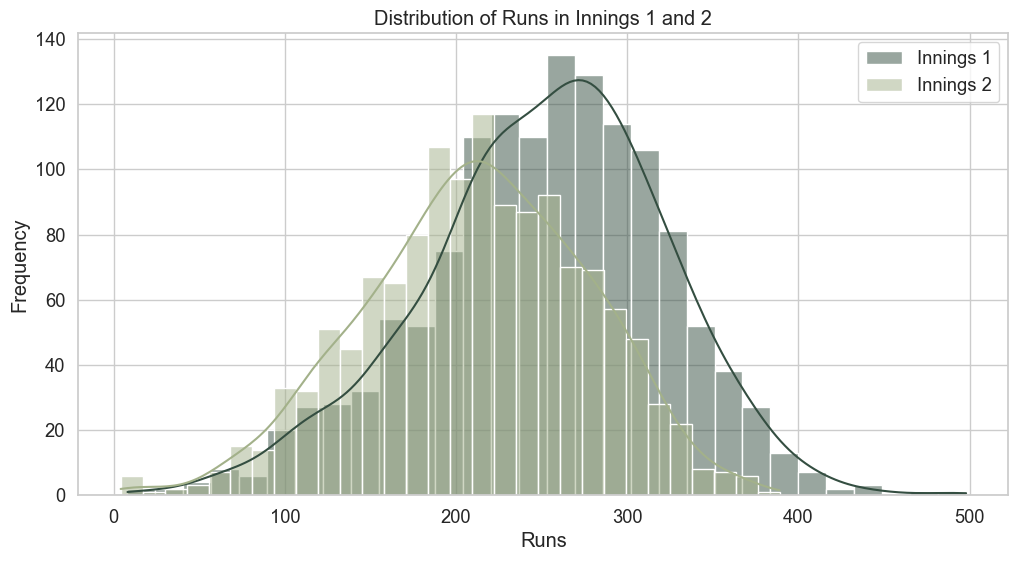

In [94]:
#Average number of wickets that fall in each innings

custom_colors = ['#344E41', '#A3B18A']

# Assuming your DataFrame is named 'innings'
plt.figure(figsize=(12, 6))

# Create histograms for Innings 1 and Innings 2
sns.histplot(x='runs', data=innings[innings['inningsNumber'] == 1], kde=True, label='Innings 1', bins=30, color=custom_colors[0])
sns.histplot(x='runs', data=innings[innings['inningsNumber'] == 2], kde=True, label='Innings 2', bins=30, color=custom_colors[1])

# Set titles and labels
plt.title('Distribution of Runs in Innings 1 and 2')
plt.xlabel('Runs')
plt.ylabel('Frequency')

# Display legend
plt.legend()

# Show the plot
plt.show()

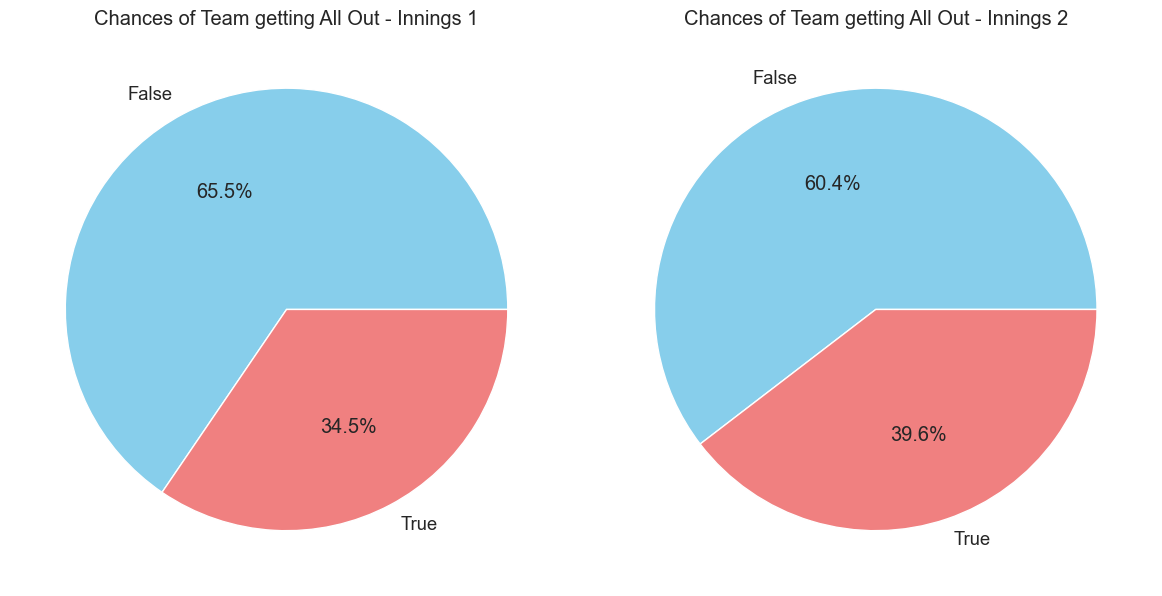

In [109]:
plt.figure(figsize=(12, 6))
# Teams getting All Out in Both Innings

# Count occurrences of 'all out' for Innings 1
all_out_counts_inning1 = innings[innings['inningsNumber'] == 1]['allOut'].value_counts()

# Count occurrences of 'all out' for Innings 2
all_out_counts_inning2 = innings[innings['inningsNumber'] == 2]['allOut'].value_counts()

# Plotting the first pie chart for Innings 1
plt.subplot(1, 2, 1)
plt.pie(all_out_counts_inning1, labels=all_out_counts_inning1.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Chances of Team getting All Out - Innings 1')

# Plotting the second pie chart for Innings 2
plt.subplot(1, 2, 2)
plt.pie(all_out_counts_inning2, labels=all_out_counts_inning2.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Chances of Team getting All Out - Innings 2')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

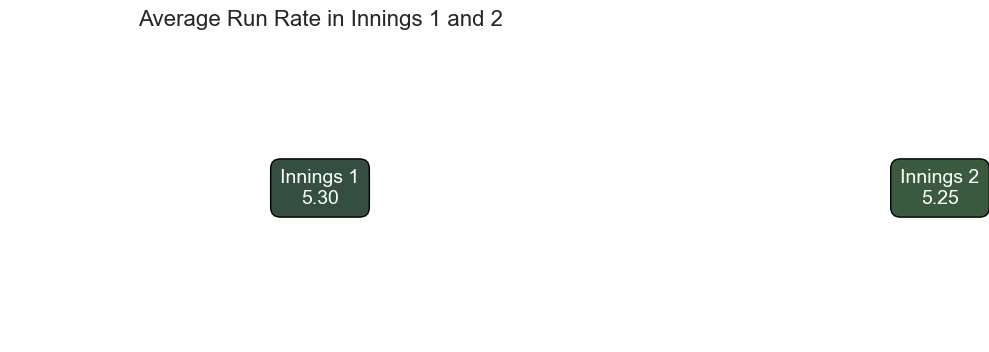

In [73]:
# Card Visualization for average run rate in 1st and 2nd Innings

custom_colors = ['#344E41', '#3A5A40', '#588157', '#A3B18A', '#DAD7CD']

# Assuming your DataFrame is named 'innings'
plt.figure(figsize=(8, 4))

# Calculate average run rate for Innings 1 and Innings 2
average_run_rate_inning1 = innings[innings['inningsNumber'] == 1]['runRate'].mean()
average_run_rate_inning2 = innings[innings['inningsNumber'] == 2]['runRate'].mean()

# Create a card-like visualization
plt.text(0.5, 0.5, f'Innings 1\n{average_run_rate_inning1:.2f}', 
         ha='center', va='center', color='white', fontsize=14,
         bbox=dict(facecolor=custom_colors[0], edgecolor='black', boxstyle='round,pad=0.5'))

plt.text(1.5, 0.5, f'Innings 2\n{average_run_rate_inning2:.2f}', 
         ha='center', va='center', color='white', fontsize=14,
         bbox=dict(facecolor=custom_colors[1], edgecolor='black', boxstyle='round,pad=0.5'))

# Adjust axes and remove ticks
plt.axis('off')

# Set the title
plt.title('Average Run Rate in Innings 1 and 2', fontsize=16)

# Show the plot
plt.show()

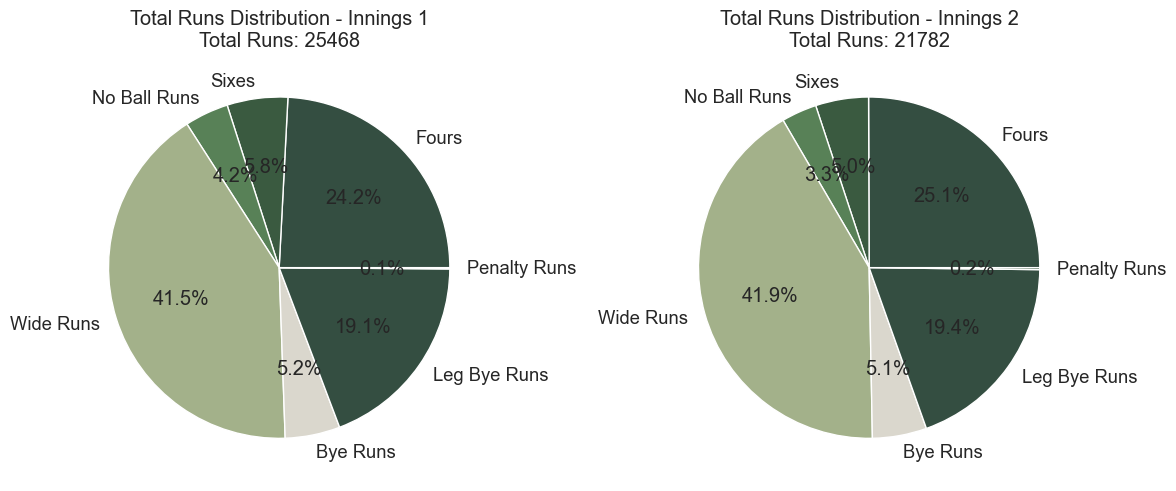

In [72]:
# Distribution of runs scored in each innings

# Color palette
custom_colors = ['#344E41', '#3A5A40', '#588157', '#A3B18A', '#DAD7CD']


plt.figure(figsize=(12, 6))

# Define the columns for runs, including penaltyRuns
runs_columns = ['fours', 'sixes', 'noBallRuns', 'wideRuns', 'byeRuns', 'legByeRuns', 'penaltyRuns']

# Calculate total runs for Innings 1 and Innings 2
total_runs_inning1 = innings[innings['inningsNumber'] == 1][runs_columns].sum().sum()
total_runs_inning2 = innings[innings['inningsNumber'] == 2][runs_columns].sum().sum()

# Labels for the pie chart
labels = ['Fours', 'Sixes', 'No Ball Runs', 'Wide Runs', 'Bye Runs', 'Leg Bye Runs', 'Penalty Runs']

# Plotting the first pie chart for Innings 1
plt.subplot(1, 2, 1)
plt.pie(innings[innings['inningsNumber'] == 1][runs_columns].sum(), labels=labels, autopct='%1.1f%%', colors=custom_colors)
plt.title(f'Total Runs Distribution - Innings 1\nTotal Runs: {total_runs_inning1}')

# Plotting the second pie chart for Innings 2
plt.subplot(1, 2, 2)
plt.pie(innings[innings['inningsNumber'] == 2][runs_columns].sum(), labels=labels, autopct='%1.1f%%', colors=custom_colors)
plt.title(f'Total Runs Distribution - Innings 2\nTotal Runs: {total_runs_inning2}')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/dn/g1n79mms5cs20l87ddpbf2wc0000gn/T/ipykernel_60412/2050744220.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Innings 1', 'Innings 2'], y=[average_overs_inning1, average_overs_inning2], palette=custom_colors)


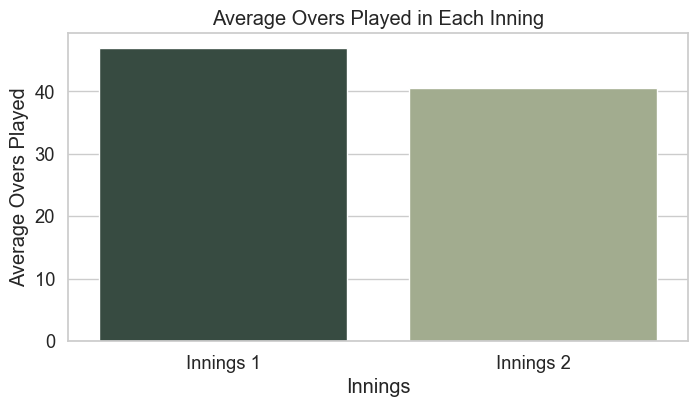

In [82]:
# Correlation between innings and total number of overs played

plt.figure(figsize=(8, 4))

# Calculate average overs played for Innings 1 and Innings 2
average_overs_inning1 = innings[innings['inningsNumber'] == 1]['overProgress'].mean()
average_overs_inning2 = innings[innings['inningsNumber'] == 2]['overProgress'].mean()

# Create a bar chart
sns.barplot(x=['Innings 1', 'Innings 2'], y=[average_overs_inning1, average_overs_inning2], palette=custom_colors)

# Set titles and labels
plt.title('Average Overs Played in Each Inning')
plt.xlabel('Innings')
plt.ylabel('Average Overs Played')

# Show the plot
plt.show()

In [84]:
datachecking(overballdetails)

-----------column----------
Index(['id', 'countingBall', 'nonCountingBall', 'score', 'bowlerId',
       'facingBatsmanId', 'boundary', 'overHistoryId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
Index: 157219 entries, 0 to 157322
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               157219 non-null  int64  
 1   countingBall     157219 non-null  int64  
 2   nonCountingBall  157219 non-null  int64  
 3   score            157219 non-null  object 
 4   bowlerId         157219 non-null  float64
 5   facingBatsmanId  157219 non-null  float64
 6   boundary         157219 non-null  bool   
 7   overHistoryId    157219 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 9.7+ MB
None
----------shape-----------
(157219, 8)
----------duplicate-----------
0
----------column types-----------
id                   int64
countingBall   

In [88]:
# MATCHES

In [90]:
datachecking(teams)

-----------column----------
Index(['team_id', 'fullName', 'shortName', 'abbreviation', 'wicketKeeperId',
       'captainId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 0 to 352
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   team_id         347 non-null    int64  
 1   fullName        347 non-null    object 
 2   shortName       347 non-null    object 
 3   abbreviation    347 non-null    object 
 4   wicketKeeperId  347 non-null    float64
 5   captainId       347 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 19.0+ KB
None
----------shape-----------
(347, 6)
----------duplicate-----------
0
----------column types-----------
team_id             int64
fullName           object
shortName          object
abbreviation       object
wicketKeeperId    float64
captainId         float64
dtype: object
----------missing values s

In [92]:
datachecking(matches)

-----------column----------
Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchStatus_outcome',
       'matchStatus_text', 'description', 'matchType', 'tournamentLabel',
       'oversLimit', 'isLimitedOvers'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1700 non-null   int64  
 1   venueId              1700 non-null   int64  
 2   toss.elected         1700 non-null   object 
 3   toss.winner          1700 non-null   object 
 4   team1Id              1700 non-null   int64  
 5   team2Id              1700 non-null   int64  
 6   matchDate            1700 non-null   object 
 7   matchEndDate         1700 non-null   object 
 8   matchDateMs          1675 non-null   float64
 9

In [95]:
datachecking(venues)

-----------column----------
Index(['venueId', 'fullName', 'shortName', 'city', 'country'], dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   venueId    193 non-null    int64 
 1   fullName   193 non-null    object
 2   shortName  193 non-null    object
 3   city       193 non-null    object
 4   country    193 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.7+ KB
None
----------shape-----------
(193, 5)
----------duplicate-----------
0
----------column types-----------
venueId       int64
fullName     object
shortName    object
city         object
country      object
dtype: object
----------missing values sum-----------
venueId      0
fullName     0
shortName    0
city         0
country      0
dtype: int64
----------end-----------


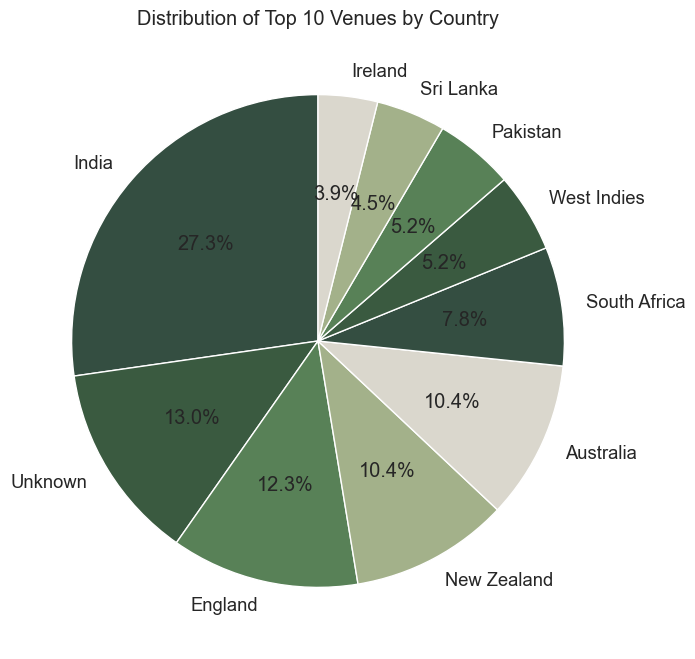

In [101]:
# Distribution of Venues by Country

custom_colors = ['#344E41', '#3A5A40', '#588157', '#A3B18A', '#DAD7CD']

# Assuming your DataFrame is named 'venues'
plt.figure(figsize=(8, 8))

# Pie chart for distribution of top 10 venues by country
top_venues_by_country = venues['country'].value_counts().nlargest(10)
sns.set_palette(custom_colors)
plt.pie(top_venues_by_country, labels=top_venues_by_country.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top 10 Venues by Country')

# Show the plot
plt.show()

/var/folders/dn/g1n79mms5cs20l87ddpbf2wc0000gn/T/ipykernel_60412/419887023.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_venues_by_city.index, y=top_venues_by_city, palette=custom_colors)
/var/folders/dn/g1n79mms5cs20l87ddpbf2wc0000gn/T/ipykernel_60412/419887023.py:10: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_venues_by_city.index, y=top_venues_by_city, palette=custom_colors)


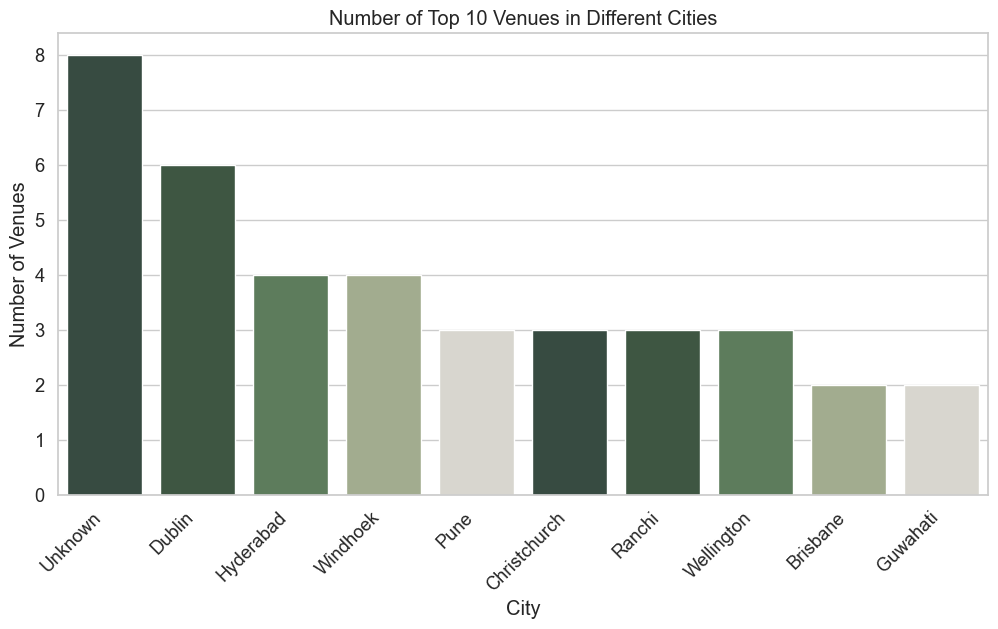

In [102]:
# Top Countries with the Most Venues

custom_colors = ['#344E41', '#3A5A40', '#588157', '#A3B18A', '#DAD7CD']

# Assuming your DataFrame is named 'venues'
plt.figure(figsize=(12, 6))

# Bar chart for the number of top 10 venues in each city
top_venues_by_city = venues['city'].value_counts().nlargest(10)
sns.barplot(x=top_venues_by_city.index, y=top_venues_by_city, palette=custom_colors)
plt.title('Number of Top 10 Venues in Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Venues')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

/var/folders/dn/g1n79mms5cs20l87ddpbf2wc0000gn/T/ipykernel_60412/2844133036.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette=custom_colors)
/var/folders/dn/g1n79mms5cs20l87ddpbf2wc0000gn/T/ipykernel_60412/2844133036.py:10: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_countries.values, y=top_countries.index, palette=custom_colors)


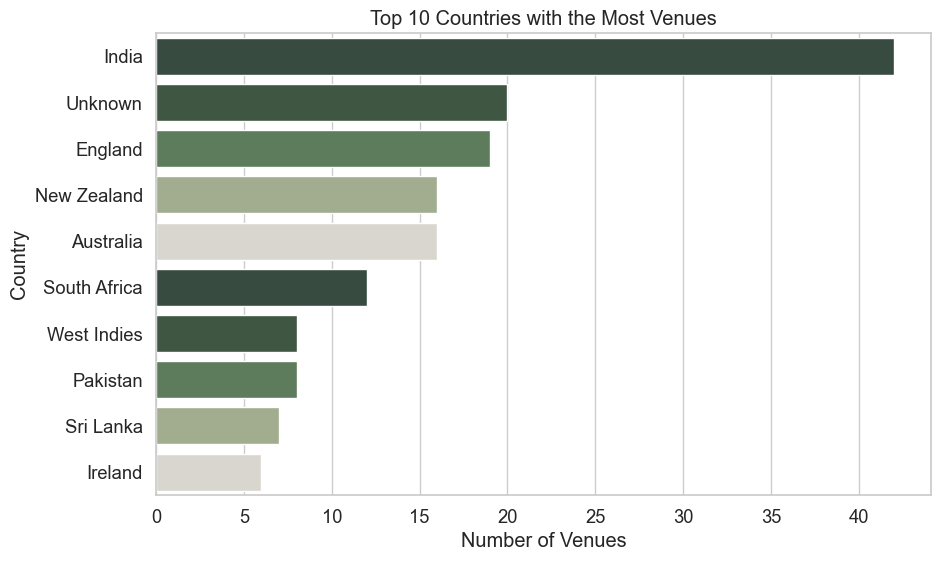

In [104]:
# Distribution of Venues by City

custom_colors = ['#344E41', '#3A5A40', '#588157', '#A3B18A', '#DAD7CD']

# Assuming your DataFrame is named 'venues'
plt.figure(figsize=(10, 6))

# Bar chart for the top 10 countries with the most venues
top_countries = venues['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette=custom_colors)
plt.title('Top 10 Countries with the Most Venues')
plt.xlabel('Number of Venues')
plt.ylabel('Country')

# Show the plot
plt.show()

/var/folders/dn/g1n79mms5cs20l87ddpbf2wc0000gn/T/ipykernel_60412/3591942992.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_venue.values, y=venue_names, palette=custom_colors)
/var/folders/dn/g1n79mms5cs20l87ddpbf2wc0000gn/T/ipykernel_60412/3591942992.py:17: UserWarning: 
The palette list has fewer values (1) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=matches_per_venue.values, y=venue_names, palette=custom_colors)


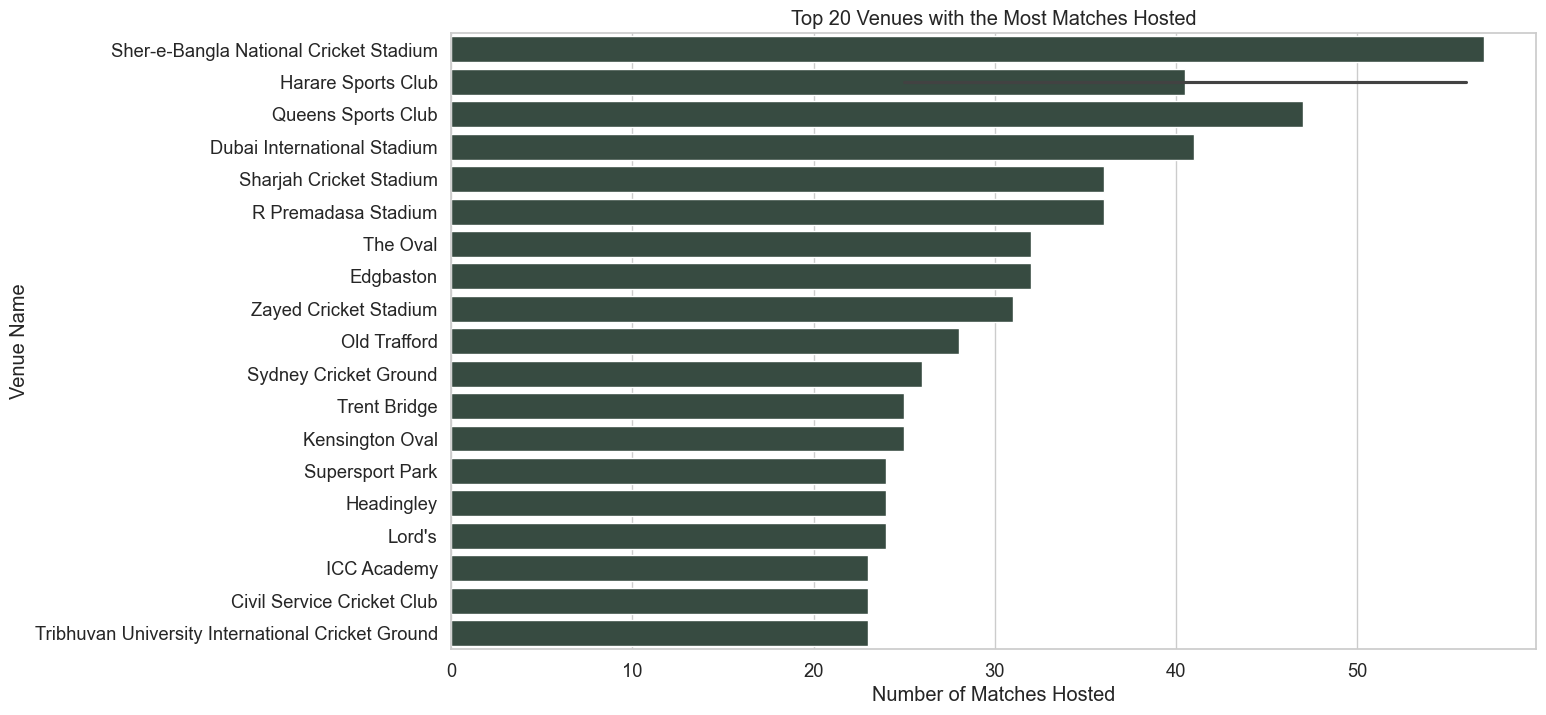

In [111]:
# Most matches hosted at Venues (Top 20)

custom_colors = ['#344E41']

plt.figure(figsize=(14, 8))

# Merge matches and venues dataframes on 'venueId'
merged_data = pd.merge(matches, venues, left_on='venueId', right_on='venueId', how='inner')

# Count the number of matches at each venue
matches_per_venue = merged_data['venueId'].value_counts().nlargest(20)

# Get venue names corresponding to venueIds
venue_names = venues.set_index('venueId').loc[matches_per_venue.index]['fullName']

# Bar chart for matches hosted at each venue with venue names (top 20)
sns.barplot(x=matches_per_venue.values, y=venue_names, palette=custom_colors)
plt.title('Top 20 Venues with the Most Matches Hosted')
plt.xlabel('Number of Matches Hosted')
plt.ylabel('Venue Name')

# Show the plot
plt.show()

                  matchStatus_text  match_result
0         Australia won by 73 runs     Australia
1      New Zealand won by 181 runs   New Zealand
2          England won by 202 runs       England
3     West Indies won by 9 wickets   West Indies
4         Australia won by 52 runs     Australia
...                            ...           ...
1695     Australia won by 123 runs     Australia
1696         India won by 228 runs         India
1697        England won by 79 runs       England
1698          India won by 41 runs         India
1699  South Africa won by 111 runs  South Africa

[1700 rows x 2 columns]


/var/folders/dn/g1n79mms5cs20l87ddpbf2wc0000gn/T/ipykernel_60412/4252108304.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_won_by_country.values, y=matches_won_by_country.index, palette=custom_colors)
/var/folders/dn/g1n79mms5cs20l87ddpbf2wc0000gn/T/ipykernel_60412/4252108304.py:25: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=matches_won_by_country.values, y=matches_won_by_country.index, palette=custom_colors)


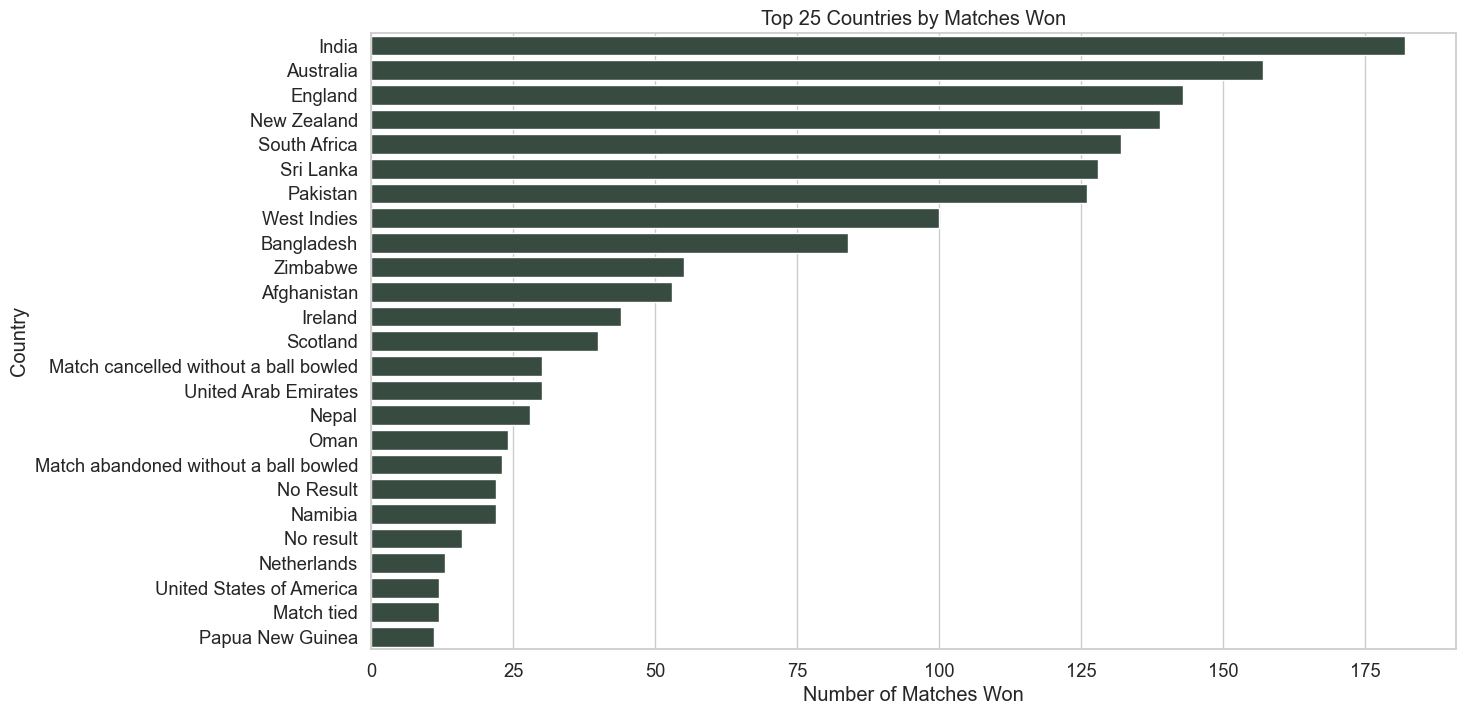

In [121]:
# Which team has won the most matches

def extract_result(text):
    # Split the text by whitespace
    words = text.split()
    # Find the index of 'won' or 'win', or use the length of the words if not found
    index = next((i for i, word in enumerate(words) if word in {'won', 'win'}), len(words))
    # Join the words up to the identified index
    return ' '.join(words[:index])

matches['match_result'] = matches['matchStatus_text'].apply(extract_result)

# Display the first few rows of the modified DataFrame
print(matches[['matchStatus_text', 'match_result']])

custom_colors = ['#344E41']

plt.figure(figsize=(14, 8))

# Count the number of matches won by each country (match_result)
matches_won_by_country = matches['match_result'].value_counts().nlargest(25)

# Bar chart for matches won by each country
sns.barplot(x=matches_won_by_country.values, y=matches_won_by_country.index, palette=custom_colors)
plt.title('Top 25 Countries by Matches Won')
plt.xlabel('Number of Matches Won')
plt.ylabel('Country')

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

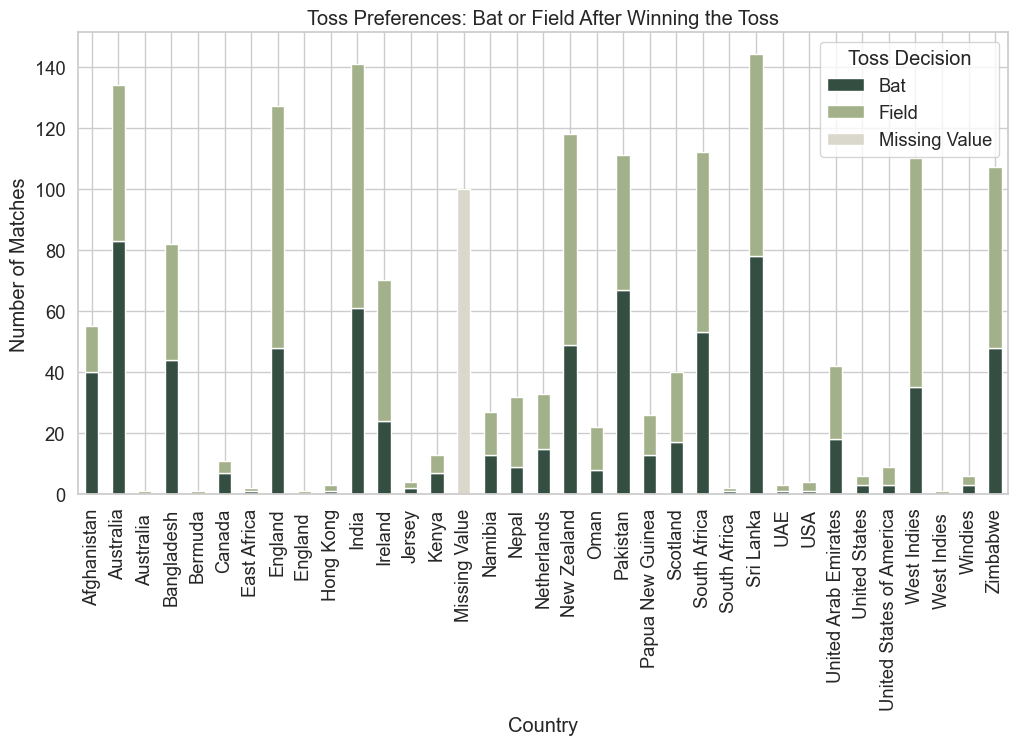

In [126]:
# Preferences of Teams after winning the toss

custom_colors = ['#344E41','#A3B18A','#DAD7CD']

# Assuming your DataFrame is named 'matches'
plt.figure(figsize=(10, 6))

# Count the number of times each country chose to bat or field after winning the toss
toss_preference_counts = matches.groupby(['toss.winner', 'toss.elected']).size().unstack().fillna(0)

# Bar chart for toss preferences with different colors for 'Field' and missing values
toss_preference_counts.plot(kind='bar', stacked=True, color=custom_colors, figsize=(12, 6))
plt.title('Toss Preferences: Bat or Field After Winning the Toss')
plt.xlabel('Country')
plt.ylabel('Number of Matches')
plt.legend(title='Toss Decision', loc='upper right')

# Show the plot
plt.show()

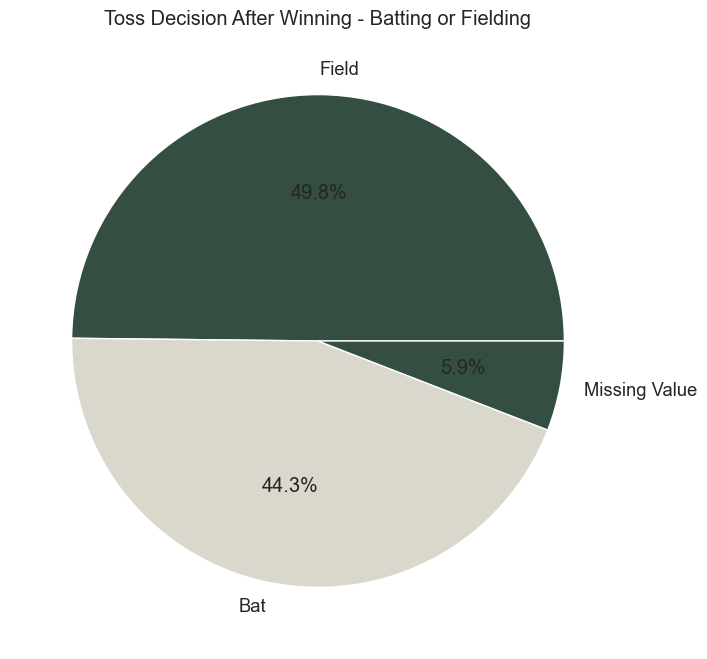

In [134]:
custom_colors = ['#344E41', '#DAD7CD']

# Assuming your DataFrame is named 'matches'
plt.figure(figsize=(8, 8))

# Count the decisions made after winning the toss
toss_decisions = matches['toss.elected'].value_counts()

# Plot the pie chart
plt.pie(toss_decisions, labels=toss_decisions.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Toss Decision After Winning - Batting or Fielding')

# Show the plot
plt.show()

In [138]:
datachecking(players)
datachecking(teams)

-----------column----------
Index(['playerId', 'fullName', 'shortName', 'nationality', 'dateOfBirth',
       'rightArmedBowl', 'rightHandedBat', 'bowlingStyle', 'teamId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
Index: 1911 entries, 0 to 28910
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   playerId        1911 non-null   int64 
 1   fullName        1911 non-null   object
 2   shortName       1911 non-null   object
 3   nationality     1911 non-null   object
 4   dateOfBirth     1911 non-null   object
 5   rightArmedBowl  1911 non-null   bool  
 6   rightHandedBat  1911 non-null   bool  
 7   bowlingStyle    1911 non-null   object
 8   teamId          1911 non-null   int64 
dtypes: bool(2), int64(2), object(5)
memory usage: 123.2+ KB
None
----------shape-----------
(1911, 9)
----------duplicate-----------
0
----------column types-----------
playerId           int64